In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import yfinance as yf # pip install yfinance --upgrade --no-cache-dir  #pip install "yfinance[nospam,repair]"
import seaborn as sns

sns.set_style("whitegrid")
import sys
import os
# Add the directory containing 'finstrument.py' to the Python path
# Manually specify the path to the directory containing 'financialinstrument.py'
module_path = '/financialinstrument.py'  # Replace this with the actual path

# Add the specified directory to the Python path
sys.path.append(module_path)
pd.set_option('display.max_columns',None)
pd.set_option('display.max_rows', None)
# alternative, if data from memory as csv file: pd.read_csv

In [2]:

from financialinstrument import FinancialInstrument

In [3]:
stock = FinancialInstrument("XLF", "2000-01-01", "2024-02-29") # any ticker from yahoo finance can be used
stock.data.head(10)



[*********************100%%**********************]  1 of 1 completed

                 Open       High        Low      Close  Adj Close      Volume
Date                                                                         
2000-01-03  19.267872  19.267872  18.455524  18.582453  11.392442     1185699
2000-01-04  18.176279  18.201666  17.605097  17.770105  10.894414      885705
2000-01-05  17.770105  17.960501  17.440088  17.630484  10.808815      717181
2000-01-06  17.681255  18.518990  17.681255  18.404753  11.283504      415832
2000-01-07  18.531681  18.734768  18.277822  18.709383  11.470265      468149
2000-01-10  18.861698  18.861698  18.328594  18.379366  11.267937      460640
2000-01-11  18.201666  18.442831  18.074736  18.074736  11.081176      476151
2000-01-12  18.214357  18.531681  18.214357  18.430138  11.299067      143288
2000-01-13  18.760155  19.077478  18.658611  18.988626  11.641467     1104576
2000-01-14  19.217100  19.559809  19.204407  19.432880  11.913825      731583
2000-01-18  19.369415  19.369415  18.785540  18.785540  11.51695

,Open,High,Low,price,Adj Close,Volume,log_returns
Date,,,,,,,
2000-01-03,19.267872,19.267872,18.455524,18.582453,11.392442,1185699,NaN
2000-01-04,18.176279,18.201666,17.605097,17.770105,10.894414,885705,-0.044700
2000-01-05,17.770105,17.960501,17.440088,17.630484,10.808815,717181,-0.007888
2000-01-06,17.681255,18.518990,17.681255,18.404753,11.283504,415832,0.042980
2000-01-07,18.531681,18.734768,18.277822,18.709383,11.470265,468149,0.016416
2000-01-10,18.861698,18.861698,18.328594,18.379366,11.267937,460640,-0.017797
2000-01-11,18.201666,18.442831,18.074736,18.074736,11.081176,476151,-0.016713
2000-01-12,18.214357,18.531681,18.214357,18.430138,11.299067,143288,0.019472
2000-01-13,18.760155,19.077478,18.658611,18.988626,11.641467,1104576,0.029853


In [4]:
stock.data.dropna(inplace = True) # get rid of NaNs
stock.data["normalized"]= stock.data['price']/stock.data.iloc[0,0]*100 # add column with normalized stock price
stock.data["weekday"]= stock.data.index.weekday # add column with week day
stock.data.head(5)


,Open,High,Low,price,Adj Close,Volume,log_returns,normalized,weekday
Date,,,,,,,,,
2000-01-04,18.176279,18.201666,17.605097,17.770105,10.894414,885705,-0.044700,97.765364,1
2000-01-05,17.770105,17.960501,17.440088,17.630484,10.808815,717181,-0.007888,96.997210,2
2000-01-06,17.681255,18.518990,17.681255,18.404753,11.283504,415832,0.042980,101.256988,3
2000-01-07,18.531681,18.734768,18.277822,18.709383,11.470265,468149,0.016416,102.932965,4
2000-01-10,18.861698,18.861698,18.328594,18.379366,11.267937,460640,-0.017797,101.117318,0


<Axes: xlabel='Date'>

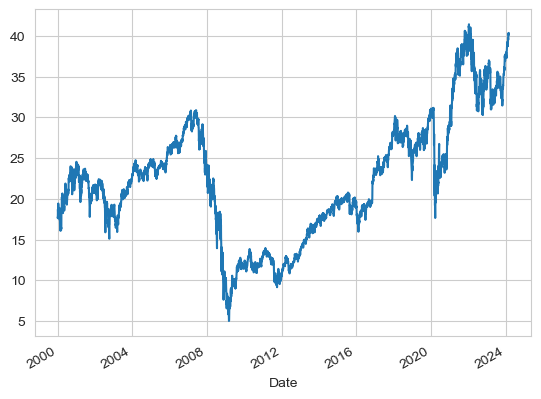

In [5]:
stock.data.price.plot()



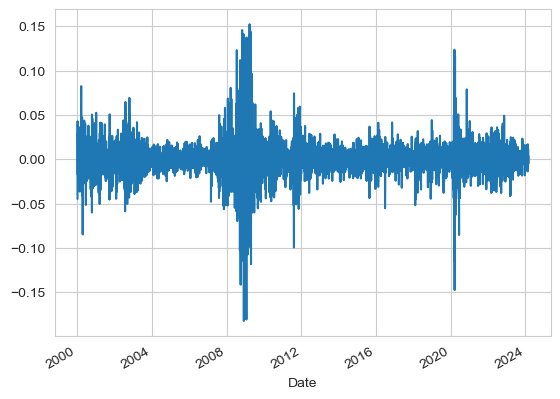

In [6]:
stock.data.log_returns.plot()
plt.show()

In [7]:
sma = 200 # 50 as standard
stock.data["SMA"] = stock.data.price.rolling(sma).mean()

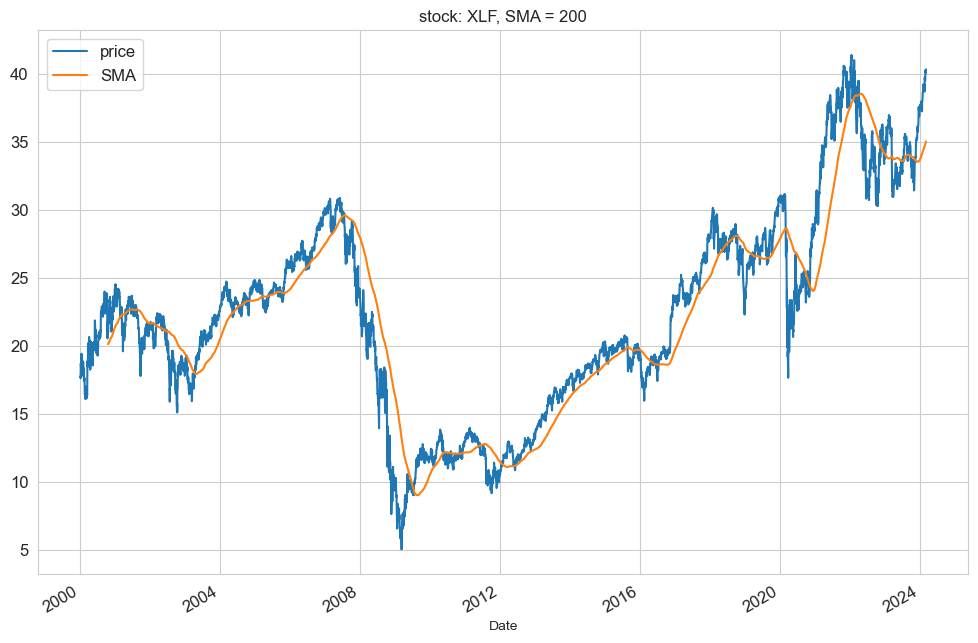

In [8]:
stock.data.loc[:, ["price", "SMA"]].plot(figsize = (12, 8), title = "stock: {}, SMA = {}".format(stock._ticker,sma), fontsize = 12)
plt.legend(fontsize = 12)
plt.show()

In [9]:
# evaluate RSI relative strength index and more indicators
import pandas_ta as ta #(env_tf) pip install pandas_ta # https://github.com/twopirllc/pandas-ta?tab=readme-ov-file#features
#help(stock.data.ta)
for rsi in [15,20,25,30]:
    stock.data["rsi("+str(rsi)+")"] = ta.rsi(stock.data["price"],rsi,100,1)
#stock.data['macd']=
stock.data['macdh1']=ta.macd(stock.data["price"], fast=12, slow=26, signal=9)["MACDs_12_26_9"]
stock.data['macdh2']=ta.macd(stock.data["price"], fast=9, slow=26, signal=12)["MACDs_9_26_12"]
stock.data['macdh3']=ta.macd(stock.data["price"], fast=14, slow=28, signal=10)["MACDs_14_28_10"]
stock.data['macdh4']=ta.macd(stock.data["price"], fast=16, slow=30, signal=11)["MACDs_16_30_11"]
stock.data['macdh5']=ta.macd(stock.data["price"], fast=10, slow=28, signal=14)["MACDs_10_28_14"]
stock.data['macdh6']=ta.macd(stock.data["price"], fast=11, slow=30, signal=16)["MACDs_11_30_16"]
for wr in [10,14,18,22,26]:
    stock.data["wr("+str(wr)+")"] = ta.willr(stock.data["High"],stock.data["Low"],stock.data["price"],wr,100,1)
stock.data['uo1']=ta.uo(stock.data["High"],stock.data["Low"],stock.data["price"], fast=7, medium= 14,slow=28)
stock.data['uo2']=ta.uo(stock.data["High"],stock.data["Low"],stock.data["price"], fast=8, medium= 16,slow=22)
stock.data['uo3']=ta.uo(stock.data["High"],stock.data["Low"],stock.data["price"], fast=9, medium= 18,slow=36)
stock.data['uo4']=ta.uo(stock.data["High"],stock.data["Low"],stock.data["price"], fast=10, medium= 20,slow=40)
#
stock.data['sto1']=ta.stoch(stock.data["High"],stock.data["Low"],stock.data["price"], 14,3,1)['STOCHk_14_3_1']


In [15]:
for sma in [5,10,15,20,25,30,35,40,60,80]:
    stock.data["sma("+str(sma)+")"] = stock.data.log_returns.rolling(sma).mean()

In [10]:
stock.data.dropna(inplace = True) # get rid of NaNs
stock.data.head(5)


,Open,High,Low,price,Adj Close,Volume,log_returns,normalized,weekday,SMA,rsi(15),rsi(20),rsi(25),rsi(30),macdh1,macdh2,macdh3,macdh4,macdh5,macdh6,wr(10),wr(14),wr(18),wr(22),wr(26),uo1,uo2,uo3,uo4,sto1
Date,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,
2000-10-17,22.009544,22.009544,21.019497,21.222584,13.143515,572661,-0.027722,116.759782,1,20.128770,39.306619,41.617041,43.475189,44.950932,-0.151436,-0.183886,-0.067803,-0.001098,-0.087176,-0.001490,-62.544158,-62.544158,-62.544158,-62.544158,-62.544158,46.458174,44.114735,45.712467,45.381105,20.848088
2000-10-18,20.207150,21.489136,20.207150,20.981419,12.994160,1686593,-0.011429,115.432969,2,20.144826,37.797831,40.341696,42.359583,43.956876,-0.211785,-0.257168,-0.121708,-0.048900,-0.156482,-0.066364,-78.467130,-79.151912,-79.151912,-79.151912,-79.151912,48.662379,49.011016,46.657354,47.407022,20.065802
2000-10-19,21.552601,22.136475,21.552601,21.971466,13.607308,488707,0.046107,120.879890,3,20.166531,46.782849,47.318160,48.059229,48.768319,-0.252682,-0.306828,-0.162046,-0.087053,-0.208344,-0.118144,-79.322029,-79.934198,-79.934198,-79.934198,-79.934198,55.786565,53.886060,52.768181,50.916687,45.723672
2000-10-20,22.034931,22.238018,21.933388,22.060316,13.662340,466303,0.004036,121.368714,4,20.184809,47.511869,47.893775,48.534962,49.173425,-0.277248,-0.336658,-0.190396,-0.116323,-0.244795,-0.157866,-49.637695,-54.276328,-54.276328,-54.276328,-54.276328,51.862654,55.308043,53.761690,52.563428,48.026291
2000-10-23,21.984159,22.034931,21.603371,21.692223,13.434375,321291,-0.016827,119.343582,0,20.199723,44.788432,45.715505,46.689506,47.561627,-0.295532,-0.358860,-0.213614,-0.141556,-0.274646,-0.192112,-26.633190,-51.973709,-51.973709,-51.973709,-51.973709,56.363974,51.366337,54.117040,52.177282,39.661015


In [11]:
price_arr = stock.data.price.to_numpy()
price_arr
print(stock.data.shape[0])
pd.set_option('mode.chained_assignment', None)
stock.data['target'] = 0
for ind in range(stock.data.shape[0]-20):
    target = 0
    for fut in range(20):
        if price_arr[ind+fut]/price_arr[ind] > 1.025: # 2.5% increase in next month
            target = 1
            #print("high yield:", ind)           
    stock.data['target'][ind]=target
stock.data = stock.data.iloc[:-20]

5877


/var/folders/14/ljpzpqp91g1dpqy4sw00h0vm0000gn/T/ipykernel_10371/97137795.py:12: FutureWarning: ChainedAssignmentError: behaviour will change in pandas 3.0!
You are setting values through chained assignment. Currently this works in certain cases, but when using Copy-on-Write (which will become the default behaviour in pandas 3.0) this will never work to update the original DataFrame or Series, because the intermediate object on which we are setting values will behave as a copy.
A typical example is when you are setting values in a column of a DataFrame, like:

df["col"][row_indexer] = value

Use `df.loc[row_indexer, "col"] = values` instead, to perform the assignment in a single step and ensure this keeps updating the original `df`.

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy

  stock.data['target'][ind]=target
/var/folders/14/ljpzpqp91g1dpqy4sw00h0vm0000gn/T/ipykernel_10371/97137795.py:12: 

In [12]:
stock.data['target'][33]


/var/folders/14/ljpzpqp91g1dpqy4sw00h0vm0000gn/T/ipykernel_10371/2633676269.py:1: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  stock.data['target'][33]


1

In [13]:
ml_X = stock.data.drop(columns=['Open','High','Low','price','Adj Close','log_returns','normalized','SMA','target'])
#ml_Y = stock.data.target.to_numpy()
ml_X
#ml_Y = stock.data.target
# Ensure ml_Y is a pandas Series
ml_Y = stock.data['target']

In [79]:
from sklearn.preprocessing import StandardScaler


train_data = ml_X.loc[:'2015-10-17']
test_data = ml_X.loc['2015-10-17':]

y_train = ml_Y.loc[:'2015-10-17']
y_test = ml_Y.loc['2015-10-17':]
#type(test_data)
# Initialize the scaler
scaler = StandardScaler()

# Fit the scaler on the training data and transform both training and testing data
train_data_scaled_arr = scaler.fit_transform(train_data)
test_data_scaled_arr = scaler.transform(test_data)

# Convert scaled data back to DataFrame for easier manipulation and inspection
train_data_scaled = pd.DataFrame(train_data_scaled_arr, index=train_data.index, columns=train_data.columns)
test_data_scaled = pd.DataFrame(test_data_scaled_arr, index=test_data.index, columns=test_data.columns)



In [15]:
"""print(train_data.head(5))
print(train_data.tail(5))

print(test_data.head(5))
print(test_data.tail(5))


print(y_train.head(5))
print(y_train.tail(5))

print(y_test.head(5))
print(y_test.tail(5))"""

'print(train_data.head(5))\nprint(train_data.tail(5))\n\nprint(test_data.head(5))\nprint(test_data.tail(5))\n\n\nprint(y_train.head(5))\nprint(y_train.tail(5))\n\nprint(y_test.head(5))\nprint(y_test.tail(5))'

# XGBoost


In [23]:
#pip install xgboost


Note: you may need to restart the kernel to use updated packages.


In [16]:
from xgboost import XGBClassifier
from sklearn.metrics import accuracy_score, classification_report
from sklearn.metrics import f1_score

In [17]:
model = XGBClassifier(
        n_estimators=100,
        max_depth=6,
        learning_rate=0.1,
        subsample=0.8,
        colsample_bytree=0.8,
        use_label_encoder=False,
        eval_metric='auc'
    )
model.fit(train_data_scaled, y_train)

/Users/pranavsrinivasvenkatesh/anaconda3/lib/python3.11/site-packages/xgboost/core.py:158: UserWarning: [11:07:02] WARNING: /Users/runner/work/xgboost/xgboost/src/learner.cc:740: 
Parameters: { "use_label_encoder" } are not used.

  warnings.warn(smsg, UserWarning)


XGBClassifier(base_score=None, booster=None, callbacks=None,
              colsample_bylevel=None, colsample_bynode=None,
              colsample_bytree=0.8, device=None, early_stopping_rounds=None,
              enable_categorical=False, eval_metric='auc', feature_types=None,
              gamma=None, grow_policy=None, importance_type=None,
              interaction_constraints=None, learning_rate=0.1, max_bin=None,
              max_cat_threshold=None, max_cat_to_onehot=None,
              max_delta_step=None, max_depth=6, max_leaves=None,
              min_child_weight=None, missing=nan, monotone_constraints=None,
              multi_strategy=None, n_estimators=100, n_jobs=None,
              num_parallel_tree=None, random_state=None, ...)

In [18]:
y_pred = model.predict(test_data_scaled)
accuracy = accuracy_score(y_test, y_pred)
report = classification_report(y_test, y_pred)
f1 = f1_score(y_test, y_pred)
print(f'Accuracy: {accuracy}')
print(f'F1-Score:{f1}')

print('Classification Report:')
print(report)

Accuracy: 0.5595009596928983
F1-Score:0.6008695652173913
Classification Report:
              precision    recall  f1-score   support

           0       0.51      0.51      0.51       933
           1       0.60      0.60      0.60      1151

    accuracy                           0.56      2084
   macro avg       0.55      0.55      0.55      2084
weighted avg       0.56      0.56      0.56      2084



## Gradient Descent

In [19]:
#pip install xgboost optuna


In [20]:
import optuna
def objective(trial):
    param = {
        'n_estimators': trial.suggest_int('n_estimators', 50, 300),
        'max_depth': trial.suggest_int('max_depth', 3, 10),
        'learning_rate': trial.suggest_loguniform('learning_rate', 0.01, 0.3),
        'gamma': trial.suggest_loguniform('gamma', 0.01, 0.5),
        'min_child_weight': trial.suggest_int('min_child_weight', 1, 10),
        'subsample': trial.suggest_uniform('subsample', 0.5, 1.0),
        'colsample_bytree': trial.suggest_uniform('colsample_bytree', 0.5, 1.0),
        'reg_alpha': trial.suggest_loguniform('reg_alpha', 0.01, 1.0),
        'reg_lambda': trial.suggest_loguniform('reg_lambda', 0.01, 1.0),
        'use_label_encoder': False,
        'eval_metric': 'auc'
    }

    model = XGBClassifier(**param)
    model.fit(train_data_scaled, y_train)
    y_pred = model.predict(test_data_scaled)
    accuracy = accuracy_score(y_test, y_pred)
    return accuracy

In [21]:
# Hyperparameter optimization with Optuna
study = optuna.create_study(direction='maximize')
study.optimize(objective, n_trials=50)

print('Best trial:')
trial = study.best_trial
print('  Value: ', trial.value)
print('  Params: ')
for key, value in trial.params.items():
    print(f'    {key}: {value}')


[I 2024-07-19 11:07:22,315] A new study created in memory with name: no-name-a88b7b15-ecec-4f44-92fb-101670c8101a
/var/folders/14/ljpzpqp91g1dpqy4sw00h0vm0000gn/T/ipykernel_10371/3784152492.py:6: FutureWarning: suggest_loguniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use suggest_float(..., log=True) instead.
  'learning_rate': trial.suggest_loguniform('learning_rate', 0.01, 0.3),
/var/folders/14/ljpzpqp91g1dpqy4sw00h0vm0000gn/T/ipykernel_10371/3784152492.py:7: FutureWarning: suggest_loguniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use suggest_float(..., log=True) instead.
  'gamma': trial.suggest_loguniform('gamma', 0.01, 0.5),
/var/folders/14/ljpzpqp91g1dpqy4sw00h0vm0000gn/T/ipykernel_10371/3784152492.py:9: FutureWarning: suggest_uniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0

Best trial:
  Value:  0.5810940499040307
  Params: 
    n_estimators: 154
    max_depth: 4
    learning_rate: 0.0337095223124171
    gamma: 0.4297605019250199
    min_child_weight: 3
    subsample: 0.9503860158989854
    colsample_bytree: 0.7855196359097256
    reg_alpha: 0.32677730373673347
    reg_lambda: 0.010041721616876


In [55]:
# Train final model with best parameters
best_params = trial.params
best_params['use_label_encoder'] = False
best_params['eval_metric'] = 'mlogloss'
model = XGBClassifier(**best_params)
model.fit(train_data, y_train)

    # Evaluate the model
y_pred = model.predict(test_data)
accuracy = accuracy_score(y_test, y_pred)
report = classification_report(y_test, y_pred)
f1 = f1_score(y_test, y_pred)
print(f'Accuracy: {accuracy}')
print(f'F1-Score:{f1}')

print('Classification Report:')
print(report)
print("Unique values in predicted labels:", np.unique(y_pred))

Accuracy: 0.5810940499040307
F1-Score:0.6357947434292867
Classification Report:
              precision    recall  f1-score   support

           0       0.54      0.48      0.51       933
           1       0.61      0.66      0.64      1151

    accuracy                           0.58      2084
   macro avg       0.57      0.57      0.57      2084
weighted avg       0.58      0.58      0.58      2084

Unique values in predicted labels: [0 1]


/Users/pranavsrinivasvenkatesh/anaconda3/lib/python3.11/site-packages/xgboost/core.py:158: UserWarning: [12:34:01] WARNING: /Users/runner/work/xgboost/xgboost/src/learner.cc:740: 
Parameters: { "use_label_encoder" } are not used.

  warnings.warn(smsg, UserWarning)


## Bayesian opt

In [23]:
#pip install xgboost scikit-optimize


In [24]:
from skopt import BayesSearchCV


In [60]:
# Define the hyperparameters space for Bayesian Optimization



param_space = {
    'n_estimators': (100, 300),
    'max_depth': (3, 10),
    'learning_rate': (0.01, 0.3, 'log-uniform'),
    'gamma': (0, 0.5),
    'min_child_weight': (1, 10),
    'subsample': (0.5, 1.0),
    'colsample_bytree': (0.5, 1.0),
    'reg_alpha': (0, 1.0),
    'reg_lambda': (0, 1.0)
}

    # Initialize the XGBoost model
xgb_model = XGBClassifier(
    use_label_encoder=False,
    eval_metric='auc'
)
"""The 'scoring' parameter of BayesSearchCV must be a str among 
{'f1_samples', 'neg_mean_squared_log_error', 'r2', 'max_error', 'f1_weighted', 'homogeneity_score', 
 'adjusted_rand_score', 'neg_mean_absolute_percentage_error', 'precision_weighted', 'rand_score', 
 'neg_root_mean_squared_error', 'accuracy', 'neg_brier_score', 'neg_mean_squared_error', 'neg_log_loss', 
 'v_measure_score', 'roc_auc_ovr', 'matthews_corrcoef', 'adjusted_mutual_info_score', 'completeness_score', 
 'fowlkes_mallows_score', 'neg_mean_poisson_deviance', 'recall_micro', 'roc_auc', 'roc_auc_ovo_weighted', 
 'jaccard_samples', 'roc_auc_ovr_weighted', 'average_precision', 'recall_weighted', 'jaccard', 'precision_samples', 
 'precision_micro', 'jaccard_macro', 'f1_macro', 'f1_micro', 'precision_macro', 'neg_root_mean_squared_log_error', 
 'neg_negative_likelihood_ratio', 'recall', 'recall_macro', 'neg_median_absolute_error', 'jaccard_micro', 'neg_mean_gamma_deviance', 
 'roc_auc_ovo', 'f1', 'balanced_accuracy', 'explained_variance', 'top_k_accuracy', 'jaccard_weighted', 'neg_mean_absolute_error', 
 'precision', 'positive_likelihood_ratio', 'recall_samples', 'normalized_mutual_info_score', 'mutual_info_score'}"""
    # Set up the Bayesian Optimization
bayes_search = BayesSearchCV(
        estimator=xgb_model,
        search_spaces=param_space,
        n_iter=32,  # number of iterations for the search
        cv=5,      # cross-validation folds
        n_jobs=-1, # use all available CPU cores
        verbose=False,
        scoring='f1'
    )

    # Perform the search
bayes_search.fit(train_data_scaled, y_train)

    # Get the best model
best_model = bayes_search.best_estimator_

    # Display the best model parameters
print("Best Model Parameters:")
print(bayes_search.best_params_)

    # Evaluate the model
y_pred = best_model.predict(test_data_scaled)
accuracy = accuracy_score(y_test, y_pred)
report = classification_report(y_test, y_pred)
f1 = f1_score(y_test, y_pred)
print(f'Accuracy: {accuracy}')
print(f'F1-Score:{f1}')
print('Classification Report:')
print("Unique values in predicted labels:",np.unique(y_pred))
print(report)

python(13781) MallocStackLogging: can't turn off malloc stack logging because it was not enabled.
python(13782) MallocStackLogging: can't turn off malloc stack logging because it was not enabled.
python(13783) MallocStackLogging: can't turn off malloc stack logging because it was not enabled.
python(13784) MallocStackLogging: can't turn off malloc stack logging because it was not enabled.
python(13785) MallocStackLogging: can't turn off malloc stack logging because it was not enabled.
python(13786) MallocStackLogging: can't turn off malloc stack logging because it was not enabled.
python(13787) MallocStackLogging: can't turn off malloc stack logging because it was not enabled.
python(13788) MallocStackLogging: can't turn off malloc stack logging because it was not enabled.
/Users/pranavsrinivasvenkatesh/anaconda3/lib/python3.11/site-packages/xgboost/core.py:158: UserWarning: [12:36:07] WARNING: /Users/runner/work/xgboost/xgboost/src/learner.cc:740: 
Parameters: { "use_label_encoder" } 

Best Model Parameters:
OrderedDict([('colsample_bytree', 0.7010559753388514), ('gamma', 0.0), ('learning_rate', 0.01), ('max_depth', 3), ('min_child_weight', 10), ('n_estimators', 100), ('reg_alpha', 0.27867022869682123), ('reg_lambda', 0.9230773103511649), ('subsample', 1.0)])
Accuracy: 0.5767754318618042
F1-Score:0.6648936170212766
Classification Report:
Unique values in predicted labels: [0 1]
              precision    recall  f1-score   support

           0       0.54      0.35      0.43       933
           1       0.59      0.76      0.66      1151

    accuracy                           0.58      2084
   macro avg       0.57      0.56      0.55      2084
weighted avg       0.57      0.58      0.56      2084



Unique values in predicted labels: [0 1]


# Neural Network

In [48]:
from sklearn.utils import class_weight
from sklearn.metrics import f1_score, accuracy_score
from tensorflow.keras.layers import Dropout, BatchNormalization
from tensorflow.keras.callbacks import EarlyStopping, ReduceLROnPlateau
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense
from tensorflow.keras.metrics import AUC
from tensorflow.keras.optimizers import Adam


In [49]:
# Calculate class weights to handle class imbalance
class_weights = class_weight.compute_class_weight('balanced', classes=np.unique(y_train), y=y_train)
class_weights = dict(enumerate(class_weights))

# Build a simpler neural network model
model = Sequential()
model.add(Dense(64, input_dim=train_data_scaled.shape[1], activation='relu'))
model.add(Dense(32, activation='relu'))
model.add(Dense(1, activation='sigmoid'))

# Compile the model with a lower learning rate
optimizer = Adam(learning_rate=0.001)
model.compile(loss='binary_crossentropy', optimizer=optimizer, metrics=[AUC()])

# Callbacks for early stopping and learning rate reduction
early_stopping = EarlyStopping(monitor='val_loss', patience=10, restore_best_weights=True)
reduce_lr = ReduceLROnPlateau(monitor='val_loss', factor=0.2, patience=5, min_lr=0.0001)

# Train the model with class weights
history = model.fit(test_data_scaled, y_train, epochs=50, batch_size=32, validation_split=0.2, class_weight=class_weights, verbose=1, callbacks=[early_stopping, reduce_lr])


Epoch 1/50
53/53 [==============================] - 2s 3ms/step - loss: 0.6985 - auc_4: 0.5401 - val_loss: 0.7558 - val_auc_4: 0.5235 - lr: 0.0010
Epoch 2/50
53/53 [==============================] - 0s 741us/step - loss: 0.6715 - auc_4: 0.6014 - val_loss: 0.7587 - val_auc_4: 0.5392 - lr: 0.0010
Epoch 3/50
53/53 [==============================] - 0s 668us/step - loss: 0.6639 - auc_4: 0.6230 - val_loss: 0.7332 - val_auc_4: 0.5165 - lr: 0.0010
Epoch 4/50
53/53 [==============================] - 0s 702us/step - loss: 0.6590 - auc_4: 0.6386 - val_loss: 0.7485 - val_auc_4: 0.5012 - lr: 0.0010
Epoch 5/50
53/53 [==============================] - 0s 747us/step - loss: 0.6549 - auc_4: 0.6398 - val_loss: 0.7205 - val_auc_4: 0.5157 - lr: 0.0010
Epoch 6/50
53/53 [==============================] - 0s 724us/step - loss: 0.6556 - auc_4: 0.6407 - val_loss: 0.7355 - val_auc_4: 0.5074 - lr: 0.0010
Epoch 7/50
53/53 [==============================] - 0s 722us/step - loss: 0.6500 - auc_4: 0.6576 - val_loss:

In [50]:
# Evaluate the model on the test data
loss, auc = model.evaluate(test_data, y_test, verbose=1)
print(f"Test Loss: {loss}")
print(f"Test AUC: {auc}")


66/66 [==============================] - 0s 346us/step - loss: 3674742.7500 - auc_4: 0.5000
Test Loss: 3674742.75
Test AUC: 0.5


In [51]:
# Predict the labels for the test data
y_pred = model.predict(test_data)
y_pred_classes = (y_pred > 0.5).astype("int32")

# Calculate F1 score and accuracy using sklearn
f1 = f1_score(y_test, y_pred_classes)
acc = accuracy_score(y_test, y_pred_classes)

print(f"Test F1 Score: {f1}")
print(f"Test Accuracy: {acc}")

# Print unique values in true labels and predicted labels
print("Unique values in true labels:", np.unique(y_test))
print("Unique values in predicted labels:", np.unique(y_pred_classes))

66/66 [==============================] - 0s 270us/step
Test F1 Score: 0.0
Test Accuracy: 0.44769673704414586
Unique values in true labels: [0 1]
Unique values in predicted labels: [0]


In [40]:
# Check the distribution of classes in the training data
unique, counts = np.unique(y_train, return_counts=True)
class_distribution_train = dict(zip(unique, counts))
print("Class distribution in training data:", class_distribution_train)

# Check the distribution of classes in the test data
unique, counts = np.unique(y_test, return_counts=True)
class_distribution_test = dict(zip(unique, counts))
print("Class distribution in test data:", class_distribution_test)

Class distribution in training data: {0: 1791, 1: 1982}
Class distribution in test data: {0: 933, 1: 1151}


## Simple NN model is not suitable as it is underfitting

In [67]:
# Build the neural network model with slightly less dropout to prevent over-regularization
model = Sequential()
model.add(Dense(256, input_dim=train_data_scaled.shape[1], activation='relu'))
model.add(BatchNormalization())
model.add(Dropout(0.3))  # Reduced dropout
model.add(Dense(128, activation='relu'))
model.add(BatchNormalization())
model.add(Dropout(0.3))  # Reduced dropout
model.add(Dense(64, activation='relu'))
model.add(BatchNormalization())
model.add(Dropout(0.3))  # Reduced dropout
model.add(Dense(32, activation='relu'))
model.add(Dense(1, activation='sigmoid'))

# Compile the model with a lower learning rate
optimizer = Adam(learning_rate=0.001)
model.compile(loss='binary_crossentropy', optimizer=optimizer, metrics=[AUC()])

# Callbacks for early stopping and learning rate reduction
early_stopping = EarlyStopping(monitor='val_loss', patience=10, restore_best_weights=True)
reduce_lr = ReduceLROnPlateau(monitor='val_loss', factor=0.2, patience=5, min_lr=0.0001)

# Train the model with class weights
history = model.fit(train_data_scaled, y_train, epochs=100, batch_size=32, validation_split=0.2, class_weight=class_weights, verbose=1, callbacks=[early_stopping, reduce_lr])

# Evaluate the model on the test data
loss, auc = model.evaluate(test_data_scaled, y_test, verbose=1)
print(f"Test Loss: {loss}")
print(f"Test AUC: {auc}")

# Predict the labels for the test data
y_pred = model.predict(test_data_scaled)
y_pred_classes = (y_pred > 0.5).astype("int32")

# Calculate F1 score and accuracy using sklearn
f1 = f1_score(y_test, y_pred_classes)
acc = accuracy_score(y_test, y_pred_classes)

print(f"Test F1 Score: {f1}")
print(f"Test Accuracy: {acc}")

# Print unique values in true labels and predicted labels
print("Unique values in true labels:", np.unique(y_test))
print("Unique values in predicted labels:", np.unique(y_pred_classes))




Epoch 1/100
95/95 [==============================] - 1s 3ms/step - loss: 0.7335 - auc_13: 0.5770 - val_loss: 0.6792 - val_auc_13: 0.5927 - lr: 0.0010
Epoch 2/100
95/95 [==============================] - 0s 1ms/step - loss: 0.6882 - auc_13: 0.6157 - val_loss: 0.6672 - val_auc_13: 0.6384 - lr: 0.0010
Epoch 3/100
95/95 [==============================] - 0s 1ms/step - loss: 0.6672 - auc_13: 0.6393 - val_loss: 0.6632 - val_auc_13: 0.6591 - lr: 0.0010
Epoch 4/100
95/95 [==============================] - 0s 1ms/step - loss: 0.6674 - auc_13: 0.6405 - val_loss: 0.6593 - val_auc_13: 0.6705 - lr: 0.0010
Epoch 5/100
95/95 [==============================] - 0s 1ms/step - loss: 0.6489 - auc_13: 0.6621 - val_loss: 0.6766 - val_auc_13: 0.6088 - lr: 0.0010
Epoch 6/100
95/95 [==============================] - 0s 1ms/step - loss: 0.6434 - auc_13: 0.6759 - val_loss: 0.6933 - val_auc_13: 0.5690 - lr: 0.0010
Epoch 7/100
95/95 [==============================] - 0s 1ms/step - loss: 0.6529 - auc_13: 0.6603 - v

## Moderate complexity NN with some Dropout, Early Stopping

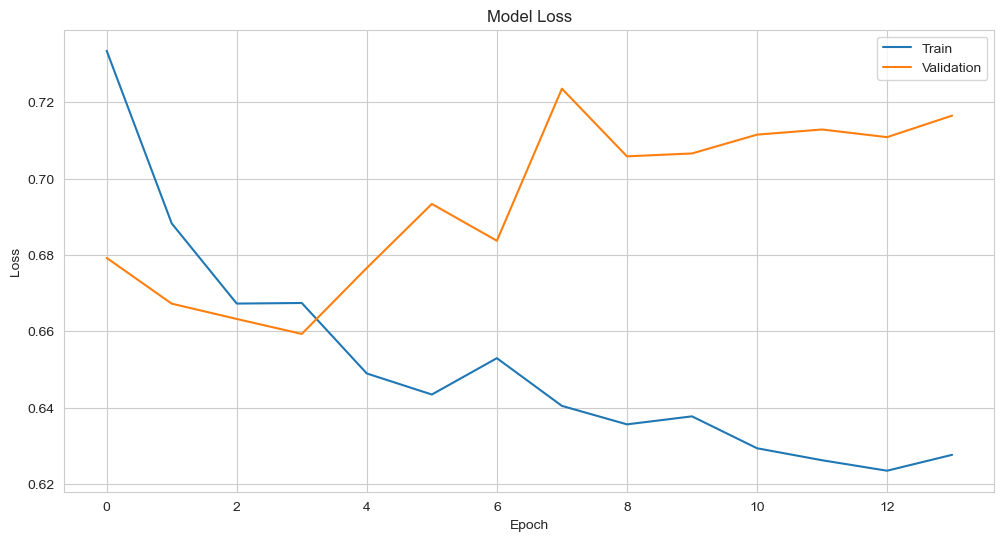

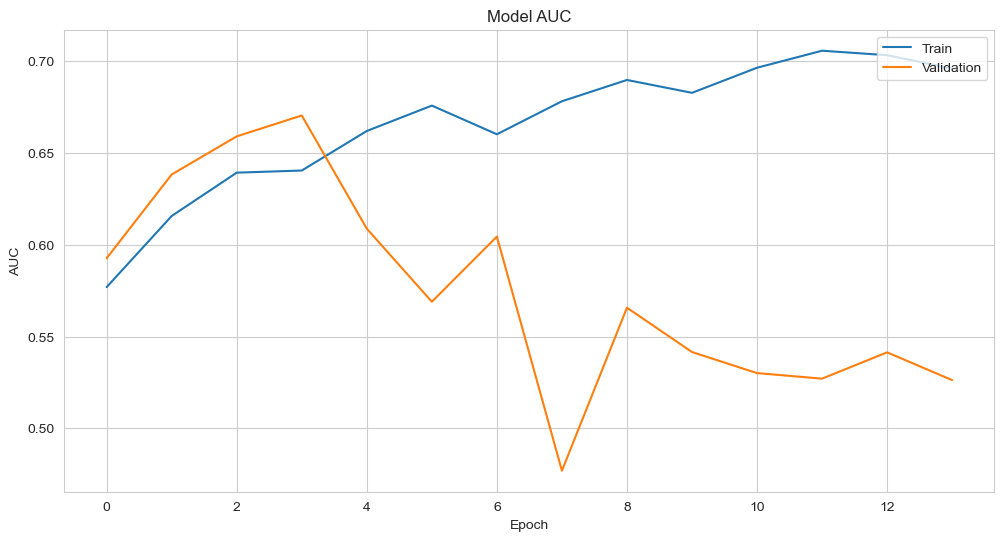

In [68]:

import matplotlib.pyplot as plt

# Plot training & validation loss values
plt.figure(figsize=(12, 6))
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('Model Loss')
plt.ylabel('Loss')
plt.xlabel('Epoch')
plt.legend(['Train', 'Validation'], loc='upper right')
plt.show()

# Plot training & validation AUC values (adjust the keys based on the actual names)
plt.figure(figsize=(12, 6))
# Update 'auc' and 'val_auc' with the correct keys from the history object
auc_key = [key for key in history.history.keys() if 'auc' in key and not 'val' in key][0]
val_auc_key = [key for key in history.history.keys() if 'val_auc' in key][0]

plt.plot(history.history[auc_key])
plt.plot(history.history[val_auc_key])
plt.title('Model AUC')
plt.ylabel('AUC')
plt.xlabel('Epoch')
plt.legend(['Train', 'Validation'], loc='upper right')
plt.show()


### With Hyp-opt

In [71]:
from tensorflow.keras.losses import BinaryCrossentropy
import keras_tuner as kt

def build_model(hp):
    model = Sequential()
    model.add(Dense(
        units=hp.Int('units_1', min_value=32, max_value=512, step=32),
        activation='relu',
        input_dim=train_data_scaled.shape[1]
    ))
    model.add(BatchNormalization())
    model.add(Dropout(hp.Float('dropout_1', min_value=0.1, max_value=0.5, step=0.1)))
    
    model.add(Dense(
        units=hp.Int('units_2', min_value=32, max_value=512, step=32),
        activation='relu'
    ))
    model.add(BatchNormalization())
    model.add(Dropout(hp.Float('dropout_2', min_value=0.1, max_value=0.5, step=0.1)))

    model.add(Dense(
        units=hp.Int('units_3', min_value=32, max_value=512, step=32),
        activation='relu'
    ))
    model.add(BatchNormalization())
    model.add(Dropout(hp.Float('dropout_3', min_value=0.1, max_value=0.5, step=0.1)))

    model.add(Dense(1, activation='sigmoid'))

    model.compile(
        optimizer=Adam(
            learning_rate=hp.Float('learning_rate', min_value=1e-4, max_value=1e-2, sampling='LOG')
        ),
        loss=BinaryCrossentropy(),
        metrics=[AUC()]
    )
    
    return model

In [73]:
tuner = kt.BayesianOptimization(
    build_model,
    objective=kt.Objective("val_auc", direction="max"),
    max_trials=20,
    executions_per_trial=2,
    directory='my_dir',
    project_name='intro_to_kt'
)

# Callback for early stopping
early_stopping = EarlyStopping(monitor='val_loss', patience=10, restore_best_weights=True)

tuner.search(
    train_data_scaled, y_train,
    epochs=50,
    validation_split=0.2,
    callbacks=[early_stopping]
)

# Get the optimal hyperparameters
best_hps = tuner.get_best_hyperparameters(num_trials=1)[0]

print(f"""
The optimal number of units in the first dense layer is {best_hps.get('units_1')}.
The optimal number of units in the second dense layer is {best_hps.get('units_2')}.
The optimal number of units in the third dense layer is {best_hps.get('units_3')}.
The optimal dropout for the first dense layer is {best_hps.get('dropout_1')}.
The optimal dropout for the second dense layer is {best_hps.get('dropout_2')}.
The optimal dropout for the third dense layer is {best_hps.get('dropout_3')}.
The optimal learning rate is {best_hps.get('learning_rate')}.
""")


Trial 20 Complete [00h 00m 07s]
val_auc: 0.6522104740142822

Best val_auc So Far: 0.6604345738887787
Total elapsed time: 00h 02m 32s

The optimal number of units in the first dense layer is 384.
The optimal number of units in the second dense layer is 256.
The optimal number of units in the third dense layer is 192.
The optimal dropout for the first dense layer is 0.4.
The optimal dropout for the second dense layer is 0.4.
The optimal dropout for the third dense layer is 0.4.
The optimal learning rate is 0.006393826148848878.



Epoch 1/100
95/95 [==============================] - 2s 5ms/step - loss: 0.7835 - auc_2: 0.5941 - val_loss: 0.6634 - val_auc_2: 0.6653
Epoch 2/100
95/95 [==============================] - 0s 3ms/step - loss: 0.6795 - auc_2: 0.6194 - val_loss: 0.6572 - val_auc_2: 0.6819
Epoch 3/100
95/95 [==============================] - 0s 3ms/step - loss: 0.6747 - auc_2: 0.6310 - val_loss: 0.6963 - val_auc_2: 0.5311
Epoch 4/100
95/95 [==============================] - 0s 4ms/step - loss: 0.6695 - auc_2: 0.6389 - val_loss: 0.6734 - val_auc_2: 0.6204
Epoch 5/100
95/95 [==============================] - 0s 2ms/step - loss: 0.6597 - auc_2: 0.6535 - val_loss: 0.7247 - val_auc_2: 0.4584
Epoch 6/100
95/95 [==============================] - 0s 2ms/step - loss: 0.6627 - auc_2: 0.6508 - val_loss: 0.7116 - val_auc_2: 0.5809
Epoch 7/100
95/95 [==============================] - 0s 3ms/step - loss: 0.6508 - auc_2: 0.6625 - val_loss: 0.7092 - val_auc_2: 0.5350
Epoch 8/100
95/95 [==============================] - 0s

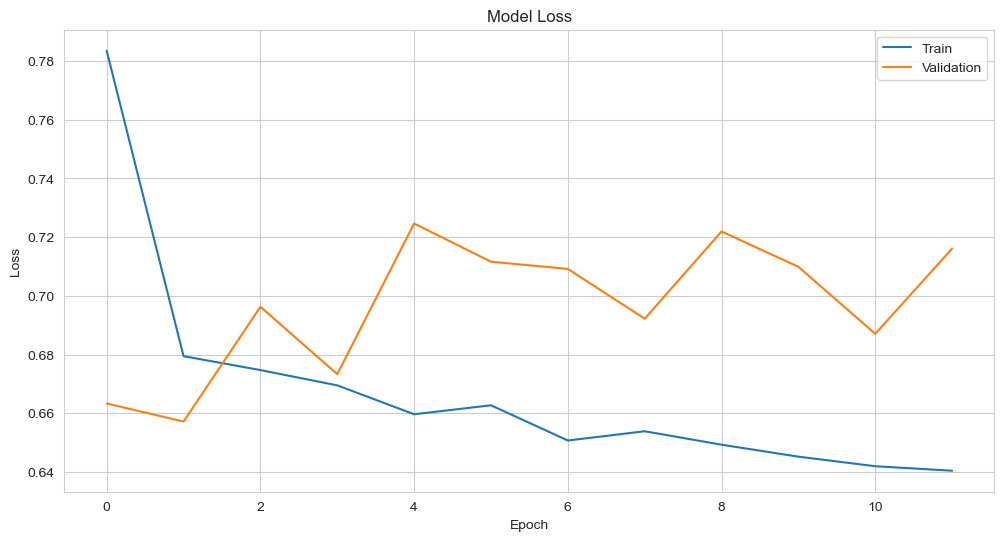

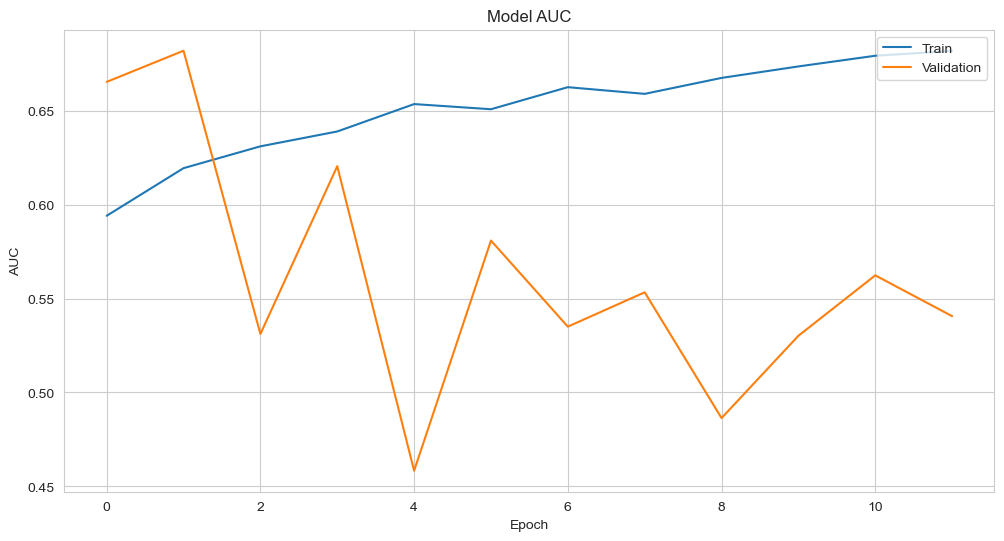

In [80]:
# Build the model with the optimal hyperparameters and train it
model = tuner.hypermodel.build(best_hps)

history = model.fit(
    train_data_scaled, y_train,
    epochs=100,
    validation_split=0.2,
    callbacks=[early_stopping]
)

# Evaluate the model on the test data
loss, auc = model.evaluate(test_data_scaled, y_test, verbose=1)
print(f"Test Loss: {loss}")
print(f"Test AUC: {auc}")

# Predict the labels for the test data
y_pred = model.predict(test_data_scaled)
y_pred_classes = (y_pred > 0.5).astype("int32")

# Calculate F1 score and accuracy using sklearn
f1 = f1_score(y_test, y_pred_classes)
acc = accuracy_score(y_test, y_pred_classes)

print(f"Test F1 Score: {f1}")
print(f"Test Accuracy: {acc}")

# Print unique values in true labels and predicted labels
print("Unique values in true labels:", np.unique(y_test))
print("Unique values in predicted labels:", np.unique(y_pred_classes))


plt.figure(figsize=(12, 6))
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('Model Loss')
plt.ylabel('Loss')
plt.xlabel('Epoch')
plt.legend(['Train', 'Validation'], loc='upper right')
plt.show()

# Plot training & validation AUC values
plt.figure(figsize=(12, 6))
auc_key = [key for key in history.history.keys() if 'auc' in key and not 'val' in key][0]
val_auc_key = [key for key in history.history.keys() if 'val_auc' in key][0]

plt.plot(history.history[auc_key])
plt.plot(history.history[val_auc_key])
plt.title('Model AUC')
plt.ylabel('AUC')
plt.xlabel('Epoch')
plt.legend(['Train', 'Validation'], loc='upper right')
plt.show()


In [75]:
#pip install keras-tuner


# LSTM

In [85]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, SimpleRNN, LSTM, Dropout
from tensorflow.keras.optimizers import Adam

In [102]:
def build_LSTM_model():
    model = Sequential()
    model.add(LSTM(
        units=256,
        activation='relu',
        input_shape=(train_data_reshaped.shape[1], 1),
        return_sequences=True
    ))
    model.add(BatchNormalization())
    model.add(Dropout(0.4))
    
    model.add(LSTM(
        units=128,
        activation='relu',
        return_sequences=True
    ))
    model.add(BatchNormalization())
    model.add(Dropout(0.4))

    model.add(LSTM(
        units=64,
        activation='relu'
    ))
    model.add(BatchNormalization())
    model.add(Dropout(0.4))

    model.add(Dense(32, activation='relu'))
    model.add(Dropout(0.4))
    model.add(Dense(1, activation='sigmoid'))

    model.compile(
        optimizer=Adam(learning_rate=0.001),
        loss=BinaryCrossentropy(),
        metrics=[AUC()]
    )
    
    return model

In [99]:
# Reshape data for LSTM
train_data_reshaped = train_data_scaled_arr.reshape((train_data_scaled_arr.shape[0], train_data_scaled_arr.shape[1], 1))
test_data_reshaped = test_data_scaled_arr.reshape((test_data_scaled_arr.shape[0], test_data_scaled_arr.shape[1], 1))

In [100]:
# Build the LSTM model
model = build_LSTM_model()

# Callbacks for early stopping and learning rate reduction
early_stopping = EarlyStopping(monitor='val_loss', patience=10, restore_best_weights=True)
reduce_lr = ReduceLROnPlateau(monitor='val_loss', factor=0.2, patience=5, min_lr=0.0001)

# Train the model
history = model.fit(
    train_data_reshaped, y_train,
    epochs=100,
    batch_size=32,
    validation_split=0.2,
    callbacks=[early_stopping, reduce_lr],
    verbose=1
)

# Evaluate the model on the test data
loss, auc = model.evaluate(test_data_reshaped, y_test, verbose=1)
print(f"Test Loss: {loss}")
print(f"Test AUC: {auc}")


Epoch 1/100
95/95 [==============================] - 11s 39ms/step - loss: 0.8157 - auc_7: 0.5422 - val_loss: 0.6914 - val_auc_7: 0.5873 - lr: 0.0010
Epoch 2/100
95/95 [==============================] - 4s 39ms/step - loss: 0.7689 - auc_7: 0.5383 - val_loss: 0.7008 - val_auc_7: 0.6546 - lr: 0.0010
Epoch 3/100
95/95 [==============================] - 4s 42ms/step - loss: 0.7409 - auc_7: 0.5347 - val_loss: 1.2833 - val_auc_7: 0.4431 - lr: 0.0010
Epoch 4/100
95/95 [==============================] - 4s 39ms/step - loss: 0.6957 - auc_7: 0.5448 - val_loss: 0.6921 - val_auc_7: 0.5000 - lr: 0.0010
Epoch 5/100
95/95 [==============================] - 4s 42ms/step - loss: 0.6860 - auc_7: 0.5715 - val_loss: 0.6939 - val_auc_7: 0.5331 - lr: 0.0010
Epoch 6/100
95/95 [==============================] - 4s 41ms/step - loss: 0.6789 - auc_7: 0.5870 - val_loss: 0.6980 - val_auc_7: 0.5829 - lr: 0.0010
Epoch 7/100
95/95 [==============================] - 4s 40ms/step - loss: 0.6805 - auc_7: 0.5752 - val_lo

In [101]:
# Predict the labels for the test data
y_pred = model.predict(test_data_reshaped)
y_pred_classes = (y_pred > 0.5).astype("int32")

# Calculate F1 score and accuracy using sklearn
f1 = f1_score(y_test, y_pred_classes)
acc = accuracy_score(y_test, y_pred_classes)

print(f"Test F1 Score: {f1}")
print(f"Test Accuracy: {acc}")

# Print unique values in true labels and predicted labels
print("Unique values in true labels:", np.unique(y_test))
print("Unique values in predicted labels:", np.unique(y_pred_classes))

66/66 [==============================] - 1s 12ms/step
Test F1 Score: 0.5351681957186545
Test Accuracy: 0.5623800383877159
Unique values in true labels: [0 1]
Unique values in predicted labels: [0 1]


## With Bayesian Hyp-opt

In [103]:
def build_LSTM_model(hp):
    model = Sequential()
    model.add(LSTM(
        units=hp.Int('units_1', min_value=32, max_value=512, step=32),
        activation='relu',
        input_shape=(train_data_reshaped.shape[1], 1),
        return_sequences=True
    ))
    model.add(BatchNormalization())
    model.add(Dropout(hp.Float('dropout_1', min_value=0.1, max_value=0.5, step=0.1)))
    
    model.add(LSTM(
        units=hp.Int('units_2', min_value=32, max_value=512, step=32),
        activation='relu',
        return_sequences=True
    ))
    model.add(BatchNormalization())
    model.add(Dropout(hp.Float('dropout_2', min_value=0.1, max_value=0.5, step=0.1)))

    model.add(LSTM(
        units=hp.Int('units_3', min_value=32, max_value=512, step=32),
        activation='relu'
    ))
    model.add(BatchNormalization())
    model.add(Dropout(hp.Float('dropout_3', min_value=0.1, max_value=0.5, step=0.1)))

    model.add(Dense(32, activation='relu'))
    model.add(Dropout(hp.Float('dropout_4', min_value=0.1, max_value=0.5, step=0.1)))
    model.add(Dense(1, activation='sigmoid'))

    model.compile(
        optimizer=Adam(learning_rate=hp.Float('learning_rate', min_value=1e-4, max_value=1e-2, sampling='LOG')),
        loss=BinaryCrossentropy(),
        metrics=[AUC()]
    )
    
    return model

In [104]:
tuner = kt.BayesianOptimization(
    build_LSTM_model,
    objective=kt.Objective("val_auc", direction="max"),
    max_trials=20,
    executions_per_trial=2,
    directory='my_dir',
    project_name='lstm_tuning'
)

# Callback for early stopping
early_stopping = EarlyStopping(monitor='val_loss', patience=10, restore_best_weights=True)

tuner.search(
    train_data_reshaped, y_train,
    epochs=50,
    validation_split=0.2,
    callbacks=[early_stopping]
)

# Get the optimal hyperparameters
best_hps = tuner.get_best_hyperparameters(num_trials=1)[0]

print(f"""
The optimal number of units in the first LSTM layer is {best_hps.get('units_1')}.
The optimal number of units in the second LSTM layer is {best_hps.get('units_2')}.
The optimal number of units in the third LSTM layer is {best_hps.get('units_3')}.
The optimal dropout for the first LSTM layer is {best_hps.get('dropout_1')}.
The optimal dropout for the second LSTM layer is {best_hps.get('dropout_2')}.
The optimal dropout for the third LSTM layer is {best_hps.get('dropout_3')}.
The optimal dropout for the dense layer is {best_hps.get('dropout_4')}.
The optimal learning rate is {best_hps.get('learning_rate')}.
""")

Trial 20 Complete [00h 04m 49s]
val_auc: 0.6512894034385681

Best val_auc So Far: 0.7088987231254578
Total elapsed time: 06h 11m 27s

The optimal number of units in the first LSTM layer is 480.
The optimal number of units in the second LSTM layer is 480.
The optimal number of units in the third LSTM layer is 352.
The optimal dropout for the first LSTM layer is 0.5.
The optimal dropout for the second LSTM layer is 0.4.
The optimal dropout for the third LSTM layer is 0.1.
The optimal dropout for the dense layer is 0.4.
The optimal learning rate is 0.0002384790796610817.



In [105]:
# Build the model with the optimal hyperparameters and train it
model = tuner.hypermodel.build(best_hps)

history = model.fit(
    train_data_reshaped, y_train,
    epochs=100,
    validation_split=0.2,
    callbacks=[early_stopping],
    verbose=1
)

# Evaluate the model on the test data
loss, auc = model.evaluate(test_data_reshaped, y_test, verbose=1)
print(f"Test Loss: {loss}")
print(f"Test AUC: {auc}")

# Predict the labels for the test data
y_pred = model.predict(test_data_reshaped)
y_pred_classes = (y_pred > 0.5).astype("int32")

# Calculate F1 score and accuracy using sklearn
f1 = f1_score(y_test, y_pred_classes)
acc = accuracy_score(y_test, y_pred_classes)

print(f"Test F1 Score: {f1}")
print(f"Test Accuracy: {acc}")

# Print unique values in true labels and predicted labels
print("Unique values in true labels:", np.unique(y_test))
print("Unique values in predicted labels:", np.unique(y_pred_classes))


Epoch 1/100
95/95 [==============================] - 17s 132ms/step - loss: 1.0200 - auc_1: 0.5337 - val_loss: 0.7035 - val_auc_1: 0.6277
Epoch 2/100
95/95 [==============================] - 12s 129ms/step - loss: 0.8730 - auc_1: 0.5605 - val_loss: 0.7153 - val_auc_1: 0.6294
Epoch 3/100
95/95 [==============================] - 13s 138ms/step - loss: 0.8067 - auc_1: 0.5721 - val_loss: 0.7097 - val_auc_1: 0.6406
Epoch 4/100
95/95 [==============================] - 13s 142ms/step - loss: 0.7887 - auc_1: 0.5593 - val_loss: 0.6880 - val_auc_1: 0.6584
Epoch 5/100
95/95 [==============================] - 15s 157ms/step - loss: 0.7396 - auc_1: 0.5841 - val_loss: 0.6882 - val_auc_1: 0.6594
Epoch 6/100
95/95 [==============================] - 15s 158ms/step - loss: 0.7495 - auc_1: 0.5837 - val_loss: 0.6977 - val_auc_1: 0.5342
Epoch 7/100
95/95 [==============================] - 12s 128ms/step - loss: 0.7418 - auc_1: 0.5773 - val_loss: 0.6672 - val_auc_1: 0.6640
Epoch 8/100
95/95 [===============

Time complexity is large and also performance are not up to the mark

In [110]:
from tensorflow.keras.callbacks import EarlyStopping, ReduceLROnPlateau, ModelCheckpoint


In [114]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Dropout, LSTM, BatchNormalization
from tensorflow.keras.optimizers.legacy import Adam
from tensorflow.keras.metrics import AUC
from tensorflow.keras.losses import BinaryCrossentropy

def build_LSTM_model():
    model = Sequential()
    model.add(LSTM(
        units=256,
        activation='relu',
        input_shape=(train_data_reshaped.shape[1], 1),
        return_sequences=True
    ))
    model.add(BatchNormalization())
    model.add(Dropout(0.4))
    
    model.add(LSTM(
        units=128,
        activation='relu',
        return_sequences=True
    ))
    model.add(BatchNormalization())
    model.add(Dropout(0.4))

    model.add(LSTM(
        units=64,
        activation='relu'
    ))
    model.add(BatchNormalization())
    model.add(Dropout(0.4))

    model.add(Dense(32, activation='relu'))
    model.add(Dropout(0.4))
    model.add(Dense(1, activation='sigmoid'))

    model.compile(
        optimizer=Adam(learning_rate=0.001),
        loss=BinaryCrossentropy(),
        metrics=[AUC()]
    )
    
    return model


In [115]:
# Build the LSTM model
model = build_LSTM_model()

# Callbacks for early stopping, learning rate reduction, and model checkpointing
early_stopping = EarlyStopping(monitor='val_loss', patience=10, restore_best_weights=True)
reduce_lr = ReduceLROnPlateau(monitor='val_loss', factor=0.2, patience=5, min_lr=0.0001)
checkpoint = ModelCheckpoint('best_model.h5', monitor='val_auc', mode='max', save_best_only=True, verbose=1)

# Train the model
history = model.fit(
    train_data_reshaped, y_train,
    epochs=100,
    batch_size=32,
    validation_split=0.2,
    callbacks=[early_stopping, reduce_lr, checkpoint],
    verbose=1
)

# Ensure the best model was saved
import os
if os.path.exists('best_model.h5'):
    # Load the best model
    model.load_weights('best_model.h5')
else:
    print("No best model found. Please check the ModelCheckpoint configuration.")

# Evaluate the model on the test data
loss, auc = model.evaluate(test_data_reshaped, y_test, verbose=1)
print(f"Test Loss: {loss}")
print(f"Test AUC: {auc}")

# Predict the labels for the test data
y_pred = model.predict(test_data_reshaped)
y_pred_classes = (y_pred > 0.5).astype("int32")

# Calculate F1 score and accuracy using sklearn
f1 = f1_score(y_test, y_pred_classes)
acc = accuracy_score(y_test, y_pred_classes)

print(f"Test F1 Score: {f1}")
print(f"Test Accuracy: {acc}")

# Print unique values in true labels and predicted labels
print("Unique values in true labels:", np.unique(y_test))
print("Unique values in predicted labels:", np.unique(y_pred_classes))

Epoch 1/100
94/95 [============================>.] - ETA: 0s - loss: 0.8547 - auc_4: 0.5394WARNING:tensorflow:Can save best model only with val_auc available, skipping.


95/95 [==============================] - 8s 42ms/step - loss: 0.8542 - auc_4: 0.5396 - val_loss: 0.7147 - val_auc_4: 0.4997 - lr: 0.0010
Epoch 2/100
95/95 [==============================] - ETA: 0s - loss: 0.7749 - auc_4: 0.5455WARNING:tensorflow:Can save best model only with val_auc available, skipping.


95/95 [==============================] - 5s 52ms/step - loss: 0.7749 - auc_4: 0.5455 - val_loss: 0.6990 - val_auc_4: 0.5580 - lr: 0.0010
Epoch 3/100
95/95 [==============================] - ETA: 0s - loss: 0.7513 - auc_4: 0.5466WARNING:tensorflow:Can save best model only with val_auc available, skipping.


95/95 [==============================] - 4s 40ms/step - loss: 0.7513 - auc_4: 0.5466 - val_loss: 0.6956 - val_auc_4: 0.6206 - lr: 0.0010
Epoch 4/100
95/95 [==============================] - ETA: 0s - loss: 0.7430 - auc_4: 0.5371WARNING:tensorflow:Can save best model only with val_auc available, skipping.


95/95 [==============================] - 4s 40ms/step - loss: 0.7430 - auc_4: 0.5371 - val_loss: 0.6962 - val_auc_4: 0.5652 - lr: 0.0010
Epoch 5/100
94/95 [============================>.] - ETA: 0s - loss: 0.7044 - auc_4: 0.5636WARNING:tensorflow:Can save best model only with val_auc available, skipping.


95/95 [==============================] - 4s 41ms/step - loss: 0.7046 - auc_4: 0.5627 - val_loss: 0.7200 - val_auc_4: 0.6509 - lr: 0.0010
Epoch 6/100
94/95 [============================>.] - ETA: 0s - loss: 0.7062 - auc_4: 0.5609WARNING:tensorflow:Can save best model only with val_auc available, skipping.


95/95 [==============================] - 5s 52ms/step - loss: 0.7071 - auc_4: 0.5604 - val_loss: 0.6907 - val_auc_4: 0.5699 - lr: 0.0010
Epoch 7/100
94/95 [============================>.] - ETA: 0s - loss: 0.6992 - auc_4: 0.5576WARNING:tensorflow:Can save best model only with val_auc available, skipping.


95/95 [==============================] - 4s 40ms/step - loss: 0.6997 - auc_4: 0.5571 - val_loss: 0.6934 - val_auc_4: 0.4877 - lr: 0.0010
Epoch 8/100
95/95 [==============================] - ETA: 0s - loss: 0.6927 - auc_4: 0.5633WARNING:tensorflow:Can save best model only with val_auc available, skipping.


95/95 [==============================] - 4s 41ms/step - loss: 0.6927 - auc_4: 0.5633 - val_loss: 0.6918 - val_auc_4: 0.6398 - lr: 0.0010
Epoch 9/100
95/95 [==============================] - ETA: 0s - loss: 0.6877 - auc_4: 0.5643WARNING:tensorflow:Can save best model only with val_auc available, skipping.


95/95 [==============================] - 4s 44ms/step - loss: 0.6877 - auc_4: 0.5643 - val_loss: 0.6915 - val_auc_4: 0.5693 - lr: 0.0010
Epoch 10/100
95/95 [==============================] - ETA: 0s - loss: 0.6849 - auc_4: 0.5687WARNING:tensorflow:Can save best model only with val_auc available, skipping.


95/95 [==============================] - 4s 42ms/step - loss: 0.6849 - auc_4: 0.5687 - val_loss: 0.6938 - val_auc_4: 0.5437 - lr: 0.0010
Epoch 11/100
94/95 [============================>.] - ETA: 0s - loss: 0.6804 - auc_4: 0.5840WARNING:tensorflow:Can save best model only with val_auc available, skipping.


95/95 [==============================] - 5s 47ms/step - loss: 0.6810 - auc_4: 0.5831 - val_loss: 0.6923 - val_auc_4: 0.6075 - lr: 0.0010
Epoch 12/100
95/95 [==============================] - ETA: 0s - loss: 0.6793 - auc_4: 0.5844WARNING:tensorflow:Can save best model only with val_auc available, skipping.


95/95 [==============================] - 4s 39ms/step - loss: 0.6793 - auc_4: 0.5844 - val_loss: 0.6924 - val_auc_4: 0.5550 - lr: 2.0000e-04
Epoch 13/100
94/95 [============================>.] - ETA: 0s - loss: 0.6740 - auc_4: 0.5946WARNING:tensorflow:Can save best model only with val_auc available, skipping.


95/95 [==============================] - 6s 59ms/step - loss: 0.6737 - auc_4: 0.5949 - val_loss: 0.6925 - val_auc_4: 0.5354 - lr: 2.0000e-04
Epoch 14/100
94/95 [============================>.] - ETA: 0s - loss: 0.6726 - auc_4: 0.5909WARNING:tensorflow:Can save best model only with val_auc available, skipping.


95/95 [==============================] - 4s 43ms/step - loss: 0.6733 - auc_4: 0.5900 - val_loss: 0.6917 - val_auc_4: 0.5591 - lr: 2.0000e-04
Epoch 15/100
95/95 [==============================] - ETA: 0s - loss: 0.6690 - auc_4: 0.6094WARNING:tensorflow:Can save best model only with val_auc available, skipping.


95/95 [==============================] - 3s 36ms/step - loss: 0.6690 - auc_4: 0.6094 - val_loss: 0.6910 - val_auc_4: 0.5491 - lr: 2.0000e-04
Epoch 16/100
95/95 [==============================] - ETA: 0s - loss: 0.6748 - auc_4: 0.6072WARNING:tensorflow:Can save best model only with val_auc available, skipping.


95/95 [==============================] - 4s 37ms/step - loss: 0.6748 - auc_4: 0.6072 - val_loss: 0.6899 - val_auc_4: 0.5677 - lr: 2.0000e-04
Epoch 17/100
94/95 [============================>.] - ETA: 0s - loss: 0.6726 - auc_4: 0.5969WARNING:tensorflow:Can save best model only with val_auc available, skipping.


95/95 [==============================] - 5s 51ms/step - loss: 0.6723 - auc_4: 0.5977 - val_loss: 0.6865 - val_auc_4: 0.6528 - lr: 2.0000e-04
Epoch 18/100
95/95 [==============================] - ETA: 0s - loss: 0.6730 - auc_4: 0.6087WARNING:tensorflow:Can save best model only with val_auc available, skipping.


95/95 [==============================] - 4s 41ms/step - loss: 0.6730 - auc_4: 0.6087 - val_loss: 0.6838 - val_auc_4: 0.6484 - lr: 2.0000e-04
Epoch 19/100
95/95 [==============================] - ETA: 0s - loss: 0.6698 - auc_4: 0.6145WARNING:tensorflow:Can save best model only with val_auc available, skipping.


95/95 [==============================] - 6s 61ms/step - loss: 0.6698 - auc_4: 0.6145 - val_loss: 0.6818 - val_auc_4: 0.6636 - lr: 2.0000e-04
Epoch 20/100
95/95 [==============================] - ETA: 0s - loss: 0.6717 - auc_4: 0.6069WARNING:tensorflow:Can save best model only with val_auc available, skipping.


95/95 [==============================] - 4s 37ms/step - loss: 0.6717 - auc_4: 0.6069 - val_loss: 0.6783 - val_auc_4: 0.6682 - lr: 2.0000e-04
Epoch 21/100
95/95 [==============================] - ETA: 0s - loss: 0.6679 - auc_4: 0.6155WARNING:tensorflow:Can save best model only with val_auc available, skipping.


95/95 [==============================] - 5s 48ms/step - loss: 0.6679 - auc_4: 0.6155 - val_loss: 0.6750 - val_auc_4: 0.6711 - lr: 2.0000e-04
Epoch 22/100
95/95 [==============================] - ETA: 0s - loss: 0.6717 - auc_4: 0.6071WARNING:tensorflow:Can save best model only with val_auc available, skipping.


95/95 [==============================] - 4s 38ms/step - loss: 0.6717 - auc_4: 0.6071 - val_loss: 0.6763 - val_auc_4: 0.6775 - lr: 2.0000e-04
Epoch 23/100
94/95 [============================>.] - ETA: 0s - loss: 0.6662 - auc_4: 0.6159WARNING:tensorflow:Can save best model only with val_auc available, skipping.


95/95 [==============================] - 4s 46ms/step - loss: 0.6661 - auc_4: 0.6159 - val_loss: 0.6731 - val_auc_4: 0.6579 - lr: 2.0000e-04
Epoch 24/100
95/95 [==============================] - ETA: 0s - loss: 0.6666 - auc_4: 0.6114WARNING:tensorflow:Can save best model only with val_auc available, skipping.


95/95 [==============================] - 4s 45ms/step - loss: 0.6666 - auc_4: 0.6114 - val_loss: 0.6708 - val_auc_4: 0.6667 - lr: 2.0000e-04
Epoch 25/100
94/95 [============================>.] - ETA: 0s - loss: 0.6647 - auc_4: 0.6252WARNING:tensorflow:Can save best model only with val_auc available, skipping.


95/95 [==============================] - 4s 43ms/step - loss: 0.6645 - auc_4: 0.6258 - val_loss: 0.6717 - val_auc_4: 0.6553 - lr: 2.0000e-04
Epoch 26/100
95/95 [==============================] - ETA: 0s - loss: 0.6707 - auc_4: 0.6105WARNING:tensorflow:Can save best model only with val_auc available, skipping.


95/95 [==============================] - 3s 35ms/step - loss: 0.6707 - auc_4: 0.6105 - val_loss: 0.6785 - val_auc_4: 0.6703 - lr: 2.0000e-04
Epoch 27/100
95/95 [==============================] - ETA: 0s - loss: 0.6696 - auc_4: 0.6210WARNING:tensorflow:Can save best model only with val_auc available, skipping.


95/95 [==============================] - 4s 41ms/step - loss: 0.6696 - auc_4: 0.6210 - val_loss: 0.6769 - val_auc_4: 0.6333 - lr: 2.0000e-04
Epoch 28/100
94/95 [============================>.] - ETA: 0s - loss: 0.6672 - auc_4: 0.6172WARNING:tensorflow:Can save best model only with val_auc available, skipping.


95/95 [==============================] - 3s 35ms/step - loss: 0.6675 - auc_4: 0.6169 - val_loss: 0.6771 - val_auc_4: 0.6337 - lr: 2.0000e-04
Epoch 29/100
94/95 [============================>.] - ETA: 0s - loss: 0.6660 - auc_4: 0.6146WARNING:tensorflow:Can save best model only with val_auc available, skipping.


95/95 [==============================] - 4s 43ms/step - loss: 0.6660 - auc_4: 0.6145 - val_loss: 0.6727 - val_auc_4: 0.6811 - lr: 2.0000e-04
Epoch 30/100
95/95 [==============================] - ETA: 0s - loss: 0.6716 - auc_4: 0.6087WARNING:tensorflow:Can save best model only with val_auc available, skipping.


95/95 [==============================] - 4s 37ms/step - loss: 0.6716 - auc_4: 0.6087 - val_loss: 0.6744 - val_auc_4: 0.6750 - lr: 1.0000e-04
Epoch 31/100
95/95 [==============================] - ETA: 0s - loss: 0.6631 - auc_4: 0.6178WARNING:tensorflow:Can save best model only with val_auc available, skipping.


95/95 [==============================] - 3s 35ms/step - loss: 0.6631 - auc_4: 0.6178 - val_loss: 0.6738 - val_auc_4: 0.6643 - lr: 1.0000e-04
Epoch 32/100
95/95 [==============================] - ETA: 0s - loss: 0.6663 - auc_4: 0.6109WARNING:tensorflow:Can save best model only with val_auc available, skipping.


95/95 [==============================] - 4s 37ms/step - loss: 0.6663 - auc_4: 0.6109 - val_loss: 0.6770 - val_auc_4: 0.6559 - lr: 1.0000e-04
Epoch 33/100
94/95 [============================>.] - ETA: 0s - loss: 0.6727 - auc_4: 0.6059WARNING:tensorflow:Can save best model only with val_auc available, skipping.


95/95 [==============================] - 4s 39ms/step - loss: 0.6723 - auc_4: 0.6069 - val_loss: 0.6794 - val_auc_4: 0.6415 - lr: 1.0000e-04
Epoch 34/100
94/95 [============================>.] - ETA: 0s - loss: 0.6649 - auc_4: 0.6147WARNING:tensorflow:Can save best model only with val_auc available, skipping.


95/95 [==============================] - 3s 36ms/step - loss: 0.6649 - auc_4: 0.6149 - val_loss: 0.6764 - val_auc_4: 0.6803 - lr: 1.0000e-04
No best model found. Please check the ModelCheckpoint configuration.
66/66 [==============================] - 1s 10ms/step - loss: 0.6686 - auc_4: 0.6170
Test Loss: 0.6685557961463928
Test AUC: 0.6170364618301392
66/66 [==============================] - 1s 9ms/step
Test F1 Score: 0.5901328273244781
Test Accuracy: 0.5854126679462572
Unique values in true labels: [0 1]
Unique values in predicted labels: [0 1]


# GRU

In [116]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Dropout, GRU, BatchNormalization
from tensorflow.keras.optimizers.legacy import Adam
from tensorflow.keras.metrics import AUC
from tensorflow.keras.losses import BinaryCrossentropy

def build_GRU_model():
    model = Sequential()
    model.add(GRU(
        units=256,
        activation='relu',
        input_shape=(train_data_reshaped.shape[1], 1),
        return_sequences=True
    ))
    model.add(BatchNormalization())
    model.add(Dropout(0.4))
    
    model.add(GRU(
        units=128,
        activation='relu',
        return_sequences=True
    ))
    model.add(BatchNormalization())
    model.add(Dropout(0.4))

    model.add(GRU(
        units=64,
        activation='relu'
    ))
    model.add(BatchNormalization())
    model.add(Dropout(0.4))

    model.add(Dense(32, activation='relu'))
    model.add(Dropout(0.4))
    model.add(Dense(1, activation='sigmoid'))

    model.compile(
        optimizer=Adam(learning_rate=0.001),
        loss=BinaryCrossentropy(),
        metrics=[AUC()]
    )
    
    return model


In [117]:
# Build the GRU model
model = build_GRU_model()

# Callbacks for early stopping, learning rate reduction, and model checkpointing
early_stopping = EarlyStopping(monitor='val_loss', patience=10, restore_best_weights=True)
reduce_lr = ReduceLROnPlateau(monitor='val_loss', factor=0.2, patience=5, min_lr=0.0001)
checkpoint = ModelCheckpoint('best_model.h5', monitor='val_auc', mode='max', save_best_only=True, verbose=1)

# Train the model
history = model.fit(
    train_data_reshaped, y_train,
    epochs=100,
    batch_size=32,
    validation_split=0.2,
    callbacks=[early_stopping, reduce_lr, checkpoint],
    verbose=1
)

# Ensure the best model was saved
if os.path.exists('best_model.h5'):
    # Load the best model
    model.load_weights('best_model.h5')
else:
    print("No best model found. Please check the ModelCheckpoint configuration.")

# Evaluate the model on the test data
loss, auc = model.evaluate(test_data_reshaped, y_test, verbose=1)
print(f"Test Loss: {loss}")
print(f"Test AUC: {auc}")

# Predict the labels for the test data
y_pred = model.predict(test_data_reshaped)
y_pred_classes = (y_pred > 0.5).astype("int32")

# Calculate F1 score and accuracy using sklearn
f1 = f1_score(y_test, y_pred_classes)
acc = accuracy_score(y_test, y_pred_classes)

print(f"Test F1 Score: {f1}")
print(f"Test Accuracy: {acc}")

# Print unique values in true labels and predicted labels
print("Unique values in true labels:", np.unique(y_test))
print("Unique values in predicted labels:", np.unique(y_pred_classes))

Epoch 1/100
94/95 [============================>.] - ETA: 0s - loss: 0.8258 - auc_5: 0.5462WARNING:tensorflow:Can save best model only with val_auc available, skipping.


95/95 [==============================] - 8s 34ms/step - loss: 0.8257 - auc_5: 0.5468 - val_loss: 0.6918 - val_auc_5: 0.6135 - lr: 0.0010
Epoch 2/100
94/95 [============================>.] - ETA: 0s - loss: 0.7586 - auc_5: 0.5433WARNING:tensorflow:Can save best model only with val_auc available, skipping.


95/95 [==============================] - 4s 39ms/step - loss: 0.7585 - auc_5: 0.5433 - val_loss: 0.6977 - val_auc_5: 0.3977 - lr: 0.0010
Epoch 3/100
94/95 [============================>.] - ETA: 0s - loss: 0.7189 - auc_5: 0.5620WARNING:tensorflow:Can save best model only with val_auc available, skipping.


95/95 [==============================] - 3s 31ms/step - loss: 0.7196 - auc_5: 0.5612 - val_loss: 0.6850 - val_auc_5: 0.6115 - lr: 0.0010
Epoch 4/100
94/95 [============================>.] - ETA: 0s - loss: 0.7070 - auc_5: 0.5677WARNING:tensorflow:Can save best model only with val_auc available, skipping.


95/95 [==============================] - 3s 33ms/step - loss: 0.7068 - auc_5: 0.5678 - val_loss: 0.6734 - val_auc_5: 0.6224 - lr: 0.0010
Epoch 5/100
94/95 [============================>.] - ETA: 0s - loss: 0.6996 - auc_5: 0.5787WARNING:tensorflow:Can save best model only with val_auc available, skipping.


95/95 [==============================] - 3s 34ms/step - loss: 0.6993 - auc_5: 0.5788 - val_loss: 0.6770 - val_auc_5: 0.6540 - lr: 0.0010
Epoch 6/100
93/95 [============================>.] - ETA: 0s - loss: 0.6899 - auc_5: 0.5827WARNING:tensorflow:Can save best model only with val_auc available, skipping.


95/95 [==============================] - 3s 31ms/step - loss: 0.6909 - auc_5: 0.5813 - val_loss: 0.8824 - val_auc_5: 0.5137 - lr: 0.0010
Epoch 7/100
94/95 [============================>.] - ETA: 0s - loss: 0.6876 - auc_5: 0.5869WARNING:tensorflow:Can save best model only with val_auc available, skipping.


95/95 [==============================] - 3s 33ms/step - loss: 0.6881 - auc_5: 0.5861 - val_loss: 0.6607 - val_auc_5: 0.6939 - lr: 0.0010
Epoch 8/100
93/95 [============================>.] - ETA: 0s - loss: 0.6784 - auc_5: 0.5896WARNING:tensorflow:Can save best model only with val_auc available, skipping.


95/95 [==============================] - 3s 31ms/step - loss: 0.6778 - auc_5: 0.5908 - val_loss: 0.6803 - val_auc_5: 0.6660 - lr: 0.0010
Epoch 9/100
93/95 [============================>.] - ETA: 0s - loss: 0.6776 - auc_5: 0.6103WARNING:tensorflow:Can save best model only with val_auc available, skipping.


95/95 [==============================] - 3s 33ms/step - loss: 0.6773 - auc_5: 0.6111 - val_loss: 0.6725 - val_auc_5: 0.6542 - lr: 0.0010
Epoch 10/100
95/95 [==============================] - ETA: 0s - loss: 0.6689 - auc_5: 0.6198WARNING:tensorflow:Can save best model only with val_auc available, skipping.


95/95 [==============================] - 3s 33ms/step - loss: 0.6689 - auc_5: 0.6198 - val_loss: 0.6820 - val_auc_5: 0.6408 - lr: 0.0010
Epoch 11/100
93/95 [============================>.] - ETA: 0s - loss: 0.6664 - auc_5: 0.6301WARNING:tensorflow:Can save best model only with val_auc available, skipping.


95/95 [==============================] - 3s 31ms/step - loss: 0.6670 - auc_5: 0.6281 - val_loss: 0.6862 - val_auc_5: 0.6055 - lr: 0.0010
Epoch 12/100
93/95 [============================>.] - ETA: 0s - loss: 0.6635 - auc_5: 0.6325WARNING:tensorflow:Can save best model only with val_auc available, skipping.


95/95 [==============================] - 3s 33ms/step - loss: 0.6642 - auc_5: 0.6310 - val_loss: 0.6759 - val_auc_5: 0.6576 - lr: 0.0010
Epoch 13/100
93/95 [============================>.] - ETA: 0s - loss: 0.6602 - auc_5: 0.6350WARNING:tensorflow:Can save best model only with val_auc available, skipping.


95/95 [==============================] - 3s 32ms/step - loss: 0.6610 - auc_5: 0.6338 - val_loss: 0.6758 - val_auc_5: 0.6418 - lr: 2.0000e-04
Epoch 14/100
94/95 [============================>.] - ETA: 0s - loss: 0.6623 - auc_5: 0.6337WARNING:tensorflow:Can save best model only with val_auc available, skipping.


95/95 [==============================] - 3s 33ms/step - loss: 0.6623 - auc_5: 0.6336 - val_loss: 0.6739 - val_auc_5: 0.6487 - lr: 2.0000e-04
Epoch 15/100
94/95 [============================>.] - ETA: 0s - loss: 0.6614 - auc_5: 0.6347WARNING:tensorflow:Can save best model only with val_auc available, skipping.


95/95 [==============================] - 4s 38ms/step - loss: 0.6623 - auc_5: 0.6339 - val_loss: 0.6734 - val_auc_5: 0.6543 - lr: 2.0000e-04
Epoch 16/100
94/95 [============================>.] - ETA: 0s - loss: 0.6555 - auc_5: 0.6411WARNING:tensorflow:Can save best model only with val_auc available, skipping.


95/95 [==============================] - 3s 32ms/step - loss: 0.6558 - auc_5: 0.6403 - val_loss: 0.6713 - val_auc_5: 0.6578 - lr: 2.0000e-04
Epoch 17/100
94/95 [============================>.] - ETA: 0s - loss: 0.6620 - auc_5: 0.6367WARNING:tensorflow:Can save best model only with val_auc available, skipping.


95/95 [==============================] - 4s 40ms/step - loss: 0.6621 - auc_5: 0.6365 - val_loss: 0.6737 - val_auc_5: 0.6421 - lr: 2.0000e-04
No best model found. Please check the ModelCheckpoint configuration.
66/66 [==============================] - 1s 9ms/step - loss: 0.6641 - auc_5: 0.6274
Test Loss: 0.6641205549240112
Test AUC: 0.6274482011795044
66/66 [==============================] - 1s 8ms/step
Test F1 Score: 0.6112866817155757
Test Accuracy: 0.586852207293666
Unique values in true labels: [0 1]
Unique values in predicted labels: [0 1]


In [118]:
def build_GRU_model(hp):
    model = Sequential()
    model.add(GRU(
        units=hp.Int('units_1', min_value=32, max_value=512, step=32),
        activation='relu',
        input_shape=(train_data_reshaped.shape[1], 1),
        return_sequences=True
    ))
    model.add(BatchNormalization())
    model.add(Dropout(hp.Float('dropout_1', min_value=0.1, max_value=0.5, step=0.1)))
    
    model.add(GRU(
        units=hp.Int('units_2', min_value=32, max_value=512, step=32),
        activation='relu',
        return_sequences=True
    ))
    model.add(BatchNormalization())
    model.add(Dropout(hp.Float('dropout_2', min_value=0.1, max_value=0.5, step=0.1)))

    model.add(GRU(
        units=hp.Int('units_3', min_value=32, max_value=512, step=32),
        activation='relu'
    ))
    model.add(BatchNormalization())
    model.add(Dropout(hp.Float('dropout_3', min_value=0.1, max_value=0.5, step=0.1)))

    model.add(Dense(32, activation='relu'))
    model.add(Dropout(hp.Float('dropout_4', min_value=0.1, max_value=0.5, step=0.1)))
    model.add(Dense(1, activation='sigmoid'))

    model.compile(
        optimizer=Adam(learning_rate=hp.Float('learning_rate', min_value=1e-4, max_value=1e-2, sampling='LOG')),
        loss=BinaryCrossentropy(),
        metrics=[AUC()]
    )
    
    return model

In [119]:
# Instantiate the tuner
tuner = kt.BayesianOptimization(
    build_GRU_model,
    objective=kt.Objective("val_auc", direction="max"),
    max_trials=20,
    executions_per_trial=2,
    directory='my_dir',
    project_name='gru_tuning'
)

# Callback for early stopping
early_stopping = EarlyStopping(monitor='val_loss', patience=10, restore_best_weights=True)

# Perform the search
tuner.search(
    train_data_reshaped, y_train,
    epochs=50,
    validation_split=0.2,
    callbacks=[early_stopping]
)

# Get the best hyperparameters
best_hps = tuner.get_best_hyperparameters(num_trials=1)[0]

print(f"""
The optimal number of units in the first GRU layer is {best_hps.get('units_1')}.
The optimal number of units in the second GRU layer is {best_hps.get('units_2')}.
The optimal number of units in the third GRU layer is {best_hps.get('units_3')}.
The optimal dropout for the first GRU layer is {best_hps.get('dropout_1')}.
The optimal dropout for the second GRU layer is {best_hps.get('dropout_2')}.
The optimal dropout for the third GRU layer is {best_hps.get('dropout_3')}.
The optimal dropout for the dense layer is {best_hps.get('dropout_4')}.
The optimal learning rate is {best_hps.get('learning_rate')}.
""")

Trial 20 Complete [00h 06m 56s]
val_auc: 0.6854707598686218

Best val_auc So Far: 0.7089110314846039
Total elapsed time: 02h 14m 43s

The optimal number of units in the first GRU layer is 224.
The optimal number of units in the second GRU layer is 416.
The optimal number of units in the third GRU layer is 288.
The optimal dropout for the first GRU layer is 0.2.
The optimal dropout for the second GRU layer is 0.1.
The optimal dropout for the third GRU layer is 0.4.
The optimal dropout for the dense layer is 0.30000000000000004.
The optimal learning rate is 0.007718655234935361.



In [120]:
# Build the model with the optimal hyperparameters and train it
model = tuner.hypermodel.build(best_hps)

history = model.fit(
    train_data_reshaped, y_train,
    epochs=100,
    validation_split=0.2,
    callbacks=[early_stopping],
    verbose=1
)

# Evaluate the model on the test data
loss, auc = model.evaluate(test_data_reshaped, y_test, verbose=1)
print(f"Test Loss: {loss}")
print(f"Test AUC: {auc}")

# Predict the labels for the test data
y_pred = model.predict(test_data_reshaped)
y_pred_classes = (y_pred > 0.5).astype("int32")

# Calculate F1 score and accuracy using sklearn
f1 = f1_score(y_test, y_pred_classes)
acc = accuracy_score(y_test, y_pred_classes)

print(f"Test F1 Score: {f1}")
print(f"Test Accuracy: {acc}")

# Print unique values in true labels and predicted labels
print("Unique values in true labels:", np.unique(y_test))
print("Unique values in predicted labels:", np.unique(y_pred_classes))


Epoch 1/100
95/95 [==============================] - 14s 92ms/step - loss: 0.7912 - auc_1: 0.5423 - val_loss: 1.1583 - val_auc_1: 0.6509
Epoch 2/100
95/95 [==============================] - 8s 79ms/step - loss: 0.6774 - auc_1: 0.5936 - val_loss: 0.6841 - val_auc_1: 0.6820
Epoch 3/100
95/95 [==============================] - 8s 84ms/step - loss: 0.6781 - auc_1: 0.6107 - val_loss: 2.0222 - val_auc_1: 0.6366
Epoch 4/100
95/95 [==============================] - 8s 81ms/step - loss: 0.6735 - auc_1: 0.6039 - val_loss: 0.6768 - val_auc_1: 0.6709
Epoch 5/100
95/95 [==============================] - 8s 84ms/step - loss: 0.6771 - auc_1: 0.6020 - val_loss: 0.6626 - val_auc_1: 0.6764
Epoch 6/100
95/95 [==============================] - 8s 81ms/step - loss: 0.6763 - auc_1: 0.6137 - val_loss: 0.9897 - val_auc_1: 0.4009
Epoch 7/100
95/95 [==============================] - 8s 81ms/step - loss: 0.6690 - auc_1: 0.6231 - val_loss: 0.7523 - val_auc_1: 0.3669
Epoch 8/100
95/95 [============================